<a href="https://colab.research.google.com/github/filipe-monteiro/notebooks/blob/main/building_micrograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# micrograd is an automatic gradient engine that implements backpropagation
# core of any dl library

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def f(x):
  return 3*x**2 - 4*x + 5

In [4]:
f(3.0)

20.0

In [5]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [6]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

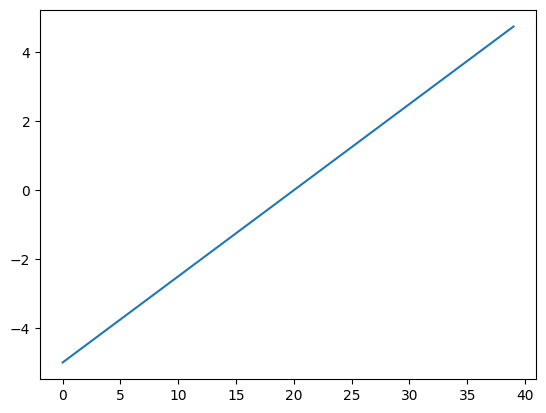

In [7]:
plt.plot(xs)

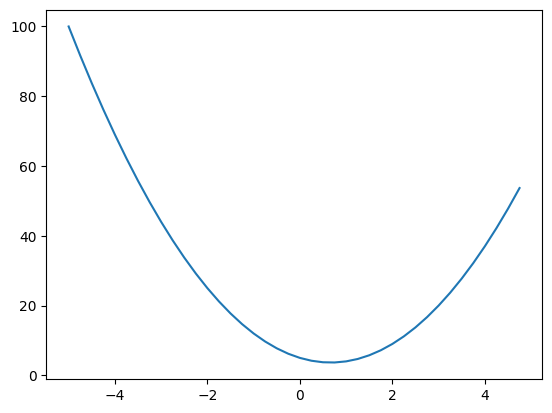

In [8]:
plt.plot(xs, ys)

In [9]:
# derivative 
# what is measuring in a function

h = 0.001
x = 3.0
f(x)

20.0

In [10]:
# what happens if you "bump" x with a small value of h
f(x + h)

20.014003000000002

In [11]:
f(x + h) - f(x)
# how much the function responded in the positive direction

0.01400300000000243

In [12]:
# normalize the rise over run
(f(x + h) - f(x)) / h

14.00300000000243

In [13]:
# to converge to the exact amount the h value has to be very small
h = 0.000000001
x = 3.0
(f(x + h) - f(x)) / h

14.000001158365194

In [14]:
# how about the slope at negative 3?
h = 0.000000001
x = -3.0
(f(x + h) - f(x)) / h

-22.000001820288162

In [15]:
# and where is it zero?
h = 0.000000001
x = 2/3
(f(x + h) - f(x)) / h

0.0

In [16]:
# lets get more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c  #function with 3 scalar inputs and single output d
print(d)

4.0


In [17]:
# derivative of d in respect to a b and c
h = 0.0001 

#inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h # bump a
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h) # normalized by h to get the slope

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [18]:
# derivative of d in respect to a b and c
h = 0.0001 

#inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h # bump b
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h) # normalized by h to get the slope
# diferentiating respective to b gives a 

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [19]:
# derivative of d in respect to a b and c
h = 0.0001 

#inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h # bump c
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h) # normalized by h to get the slope

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [20]:
class Value:
  def __init__(self, data):
    self.data = data

  def __repr__(self):
    return f"Value(data={self.data})"


In [21]:
a = Value(2.0)
a # value object with data equal to 2

Value(data=2.0)

In [22]:
b = Value(-3.0)
a, b
# but if I try to a + b it gives error because python doesnt know how to add two value objects

(Value(data=2.0), Value(data=-3.0))

In [23]:
class Value:
  def __init__(self, data):
    self.data = data

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other): #double underscore define these operators
    out = Value(self.data + other.data)
    return out 

In [24]:
a = Value(2.0)
b = Value(-3.0)
a, b

(Value(data=2.0), Value(data=-3.0))

In [25]:
a + b # now it works

Value(data=-1.0)

In [26]:
# now multiply

class Value:
  def __init__(self, data):
    self.data = data

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data)
    return out 

  def __mul__(self, other): 
    out = Value(self.data * other.data)
    return out 

In [27]:
a = Value(2.0)
b = Value(-3.0)
a*b

Value(data=-6.0)

In [28]:
c = Value(10.0)

In [29]:
a*b + c # under the hood it's doing (a.__mul__(b)).__add__(c)

Value(data=4.0)

In [30]:
(a.__mul__(b)).__add__(c)

Value(data=4.0)

In [31]:
# want to keep pointers to know which values produce other values

class Value:
  def __init__(self, data, _children=()):
    self.data = data
    self._prev = set(_children) # tuple, eg when feeding value a this will be an empty set

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other)) # children are fed here
    return out 

  def __mul__(self, other): 
    out = Value(self.data * other.data, (self, other))
    return out 

a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

d = a*b + c
d

Value(data=4.0)

In [32]:
d._prev # we can see the children fed to get this value (a*b) and c

{Value(data=-6.0), Value(data=10.0)}

In [33]:
# last piece of info needed is the operation used to create these values

class Value:
  def __init__(self, data, _children=(), _op='',): # adding the operation value empty here 
    self.data = data
    self._prev = set(_children) # tuple, eg when feeding value a this will be an empty set
    self._op = _op

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+') # children are fed here,and the plus operator
    return out 

  def __mul__(self, other): 
    out = Value(self.data * other.data, (self, other), '*')
    return out 

a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

d = a*b + c
d

Value(data=4.0)

In [34]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [35]:
d._op

'+'

In [36]:
# now we have the data structure and how values where obtained
# need to visualize with this function draw_dot

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot_ul(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR is left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ data %.4f }" % (n.data, ), shape='record')
    if n._op:
      # if thos value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)
  
  return


In [37]:
draw_dot_ul(d) # without the label

In [38]:
class Value:
  def __init__(self, data, _children=(), _op='', label=''): # adding the operation value empty here and label
    self.data = data
    self._prev = set(_children) # tuple, eg when feeding value a this will be an empty set
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+') # children are fed here,and the plus operator
    return out 

  def __mul__(self, other): 
    out = Value(self.data * other.data, (self, other), '*')
    return out 

a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
d

Value(data=4.0)

In [39]:
# now we have the data structure and how values where obtained
# need to visualize with this function draw_dot

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot1(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR is left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if thos value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)
  
  return dot

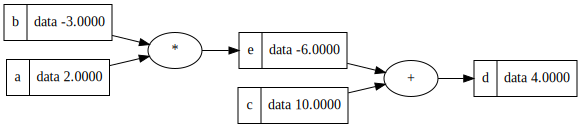

In [40]:
draw_dot1(d)

In [41]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label = 'f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

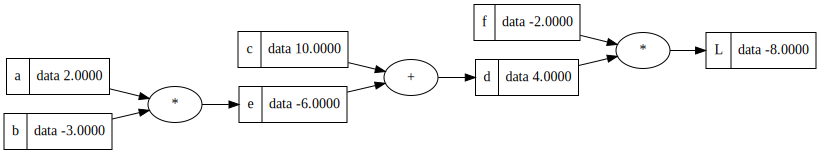

In [42]:
draw_dot1(L) # visualizes the forward pass to produces a single output L

In [43]:
# next is to run backpropagation (go from L to calculate the gradient of all intermediate values, and calculate the derivative of that node in respect to L)
# image L as loss function and figure its derivative to its weights in the NN

# creating a variable in the value class that maintains the derivative of L in respective to each value called GRAD

class Value:
  def __init__(self, data, _children=(), _op='', label=''): # adding the operation value empty here and label
    self.data = data
    self.grad = 0.0 # this is 0 because at initialization each value doesn't affect the output, it's changing nothing in the loss function
    self._prev = set(_children) # tuple, eg when feeding value a this will be an empty set
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+') # children are fed here,and the plus operator
    return out 

  def __mul__(self, other): 
    out = Value(self.data * other.data, (self, other), '*')
    return out 

In [44]:
# now we have the data structure and how values where obtained
# need to visualize with this function draw_dot

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR is left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record') # added grad viz
    if n._op:
      # if thos value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)
  
  return dot

In [45]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label = 'f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

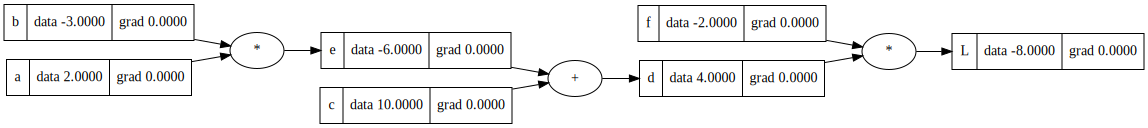

In [46]:
draw_dot(L)

In [49]:
# now let's do backpropagation manually
# lets with L to start. what is the derivative of L to respective of L? lol it's 1

def lol():

  h = 0.0001
  a = Value(2.0, label = 'a')
  b = Value(-3.0, label = 'b')
  c = Value(10.0, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data # it's a value node we want the data

  a = Value(2.0 + h, label = 'a')
  b = Value(-3.0, label = 'b')
  c = Value(10.0, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h) # rise over run

#derivative of L respective to a

lol()
# if h was added to L2 (L2 + h) the derivative would be ~1.0

6.000000000021544


In [52]:
def lmao():

  h = 0.0001
  a = Value(2.0, label = 'a')
  b = Value(-3.0, label = 'b')
  c = Value(10.0, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data # it's a value node we want the data

  a = Value(2.0, label = 'a')
  b = Value(-3.0, label = 'b')
  c = Value(10.0, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L2 = L.data + h

  print((L2 - L1)/h) # rise over run

lmao()

0.9999999999976694


In [50]:
#so if if we define L.grad = 1.0 it will fill in the data structure
L.grad = 1.0

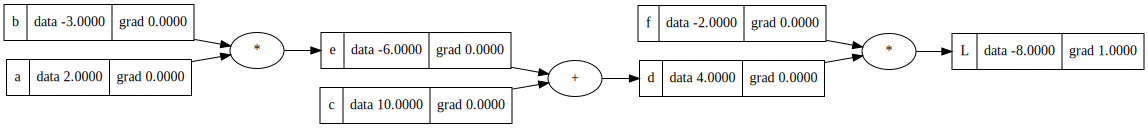

In [51]:
draw_dot(L)

In [53]:
# derivative of L respective to d and f
# L = d* f
# dL/dd = ? it would be f 

# (f(x+h)-f(x))/h


# so f.grad is the value of d and vice-versa

In [54]:
f.grad = 4.0
d.grad = -2.0


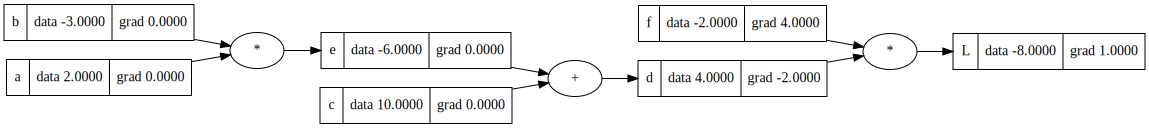

In [55]:
draw_dot(L)

 now is the most important node, the crux
 need to derive dL / dc

 first what is dd / dc ? it's 1.0

chain rule calculates the global derivative not the local one

 if z depends on y and y depends on x ( y and z and dependent variables) then z depends on x as well so:

 dz/dx = dz/dy * dy/dx

 WANT dL/dc

 KNOW dL / dd and dd / dc

so 

dL / dc = (dL / dd) * (dd / dc) this is chain rule basically


dd/dc is basically 1 so we kinda calculated that dL / dc is dL / dd

In [56]:
# plus node just routes the grade it's just 1.0
# c is 1 * -2 ad same thing for e (it is being routed from the derivative of d)
# the plus sign just distributed the derivative to all the children nodes
c.grad = -2.0
e.grad = -2.0

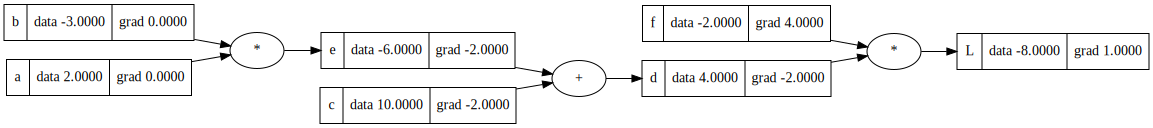

In [57]:
draw_dot(L)

In [60]:
def rofl():

  h = 0.001
  a = Value(2.0, label = 'a')
  b = Value(-3.0, label = 'b')
  c = Value(10.0, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data # it's a value node we want the data

  a = Value(2.0, label = 'a')
  b = Value(-3.0, label = 'b')
  c = Value(10.0, label = 'c')
  c.data += h
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h) # rise over run

rofl() # lets verify

-1.9999999999988916


In [61]:
# now we recurse back all the way to last node
# dL / da = (dL / de) * (de / da)

# e = a * b
# de / da?


a.grad = -2.0 * -3.0 # value of b and c
b.grad = -2.0 * 2.0  # value of a and c


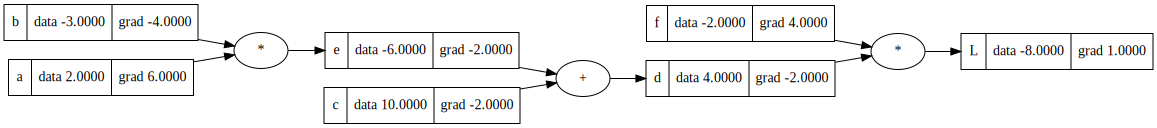

In [62]:
draw_dot(L)

In [63]:
# manual backpropagation done!

# let's try to make L go up

a.data += 0.01 * a.data
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-7.524832
